## This notebook will show the initial finidings of time-series analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/chris/Documents/Senior_Project/CT_SeniorProject/CrashData_Repo1/data/interim/filtered_dataset.csv")


In [4]:
# print head of df
print(df.head())

                                     CRASH_RECORD_ID CRASH_DATE_EST_I  \
0  351626f25a540a0fccbe42fb815b14ae6c75c15676bf7c...              NaN   
1  f798e1cdba8adfb80ee2aaeea541a55dd32fa8aff38494...                Y   
2  0ad333cd371ec3976f9fac8160ccfc91f0399b48a92b7f...              NaN   
3  dfb3229940c672426c4010d7348d16b69b030191213b86...                Y   
4  821ee3270b2c503fd0905415f674d3f4a63e1ac15d9100...              NaN   

   CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0  2018-01-01                  30            NO CONTROLS   
1  2018-01-01                  20            NO CONTROLS   
2  2018-01-01                  25            NO CONTROLS   
3  2018-01-01                  30            NO CONTROLS   
4  2018-01-01                  35            NO CONTROLS   

       DEVICE_CONDITION WEATHER_CONDITION      LIGHTING_CONDITION  \
0           NO CONTROLS             CLEAR                 UNKNOWN   
1           NO CONTROLS             CLEAR                DAYLI

In [8]:
# Check for missing data: Look at difference in time between records and plot d/t

# Create new df to look at time differences (and only including certain columns)
columns_to_keep = [ # selected columns to keep for analysis
    "CRASH_DATETIME", "CRASH_DATE", "CRASH_TIME", "CRASH_DAY_OF_WEEK", "Day_Of_Year",
    "Hour_Of_Day", "Hour_Of_Week", "LATITUDE", "LONGITUDE",
    "WEATHER_CONDITION", "LIGHTING_CONDITION"
]
# Create a new DataFrame with selected columns
df_time_diff = df[columns_to_keep].copy()

# Compute the time difference (Δt) between consecutive crashes in minutes
df_time_diff['CRASH_DATETIME'] = pd.to_datetime(df_time_diff['CRASH_DATETIME'])
df_time_diff['Time_Difference'] = df_time_diff['CRASH_DATETIME'].diff().dt.total_seconds() / 60  # Convert to minutes

# Drop the first row since the first time difference is NaN
df_time_diff = df_time_diff.dropna()

# Reset index for clarity
df_time_diff = df_time_diff.reset_index(drop=True)

# print the first few rows of the new DataFrame
print(df_time_diff.head())

       CRASH_DATETIME  CRASH_DATE CRASH_TIME  CRASH_DAY_OF_WEEK  Day_Of_Year  \
0 2018-01-01 00:00:00  2018-01-01   00:00:00                  1            1   
1 2018-01-01 00:00:00  2018-01-01   00:00:00                  1            1   
2 2018-01-01 00:05:00  2018-01-01   00:05:00                  1            1   
3 2018-01-01 00:07:00  2018-01-01   00:07:00                  1            1   
4 2018-01-01 00:20:00  2018-01-01   00:20:00                  1            1   

   Hour_Of_Day  Hour_Of_Week   LATITUDE  LONGITUDE WEATHER_CONDITION  \
0            0             0  41.800575 -87.589225             CLEAR   
1            0             0  41.681735 -87.641014           UNKNOWN   
2            0             0  41.949417 -87.668774             CLEAR   
3            0             0  41.683946 -87.622993              SNOW   
4            0             0  41.985479 -87.659979              SNOW   

       LIGHTING_CONDITION  Time_Difference  
0                DAYLIGHT              0.

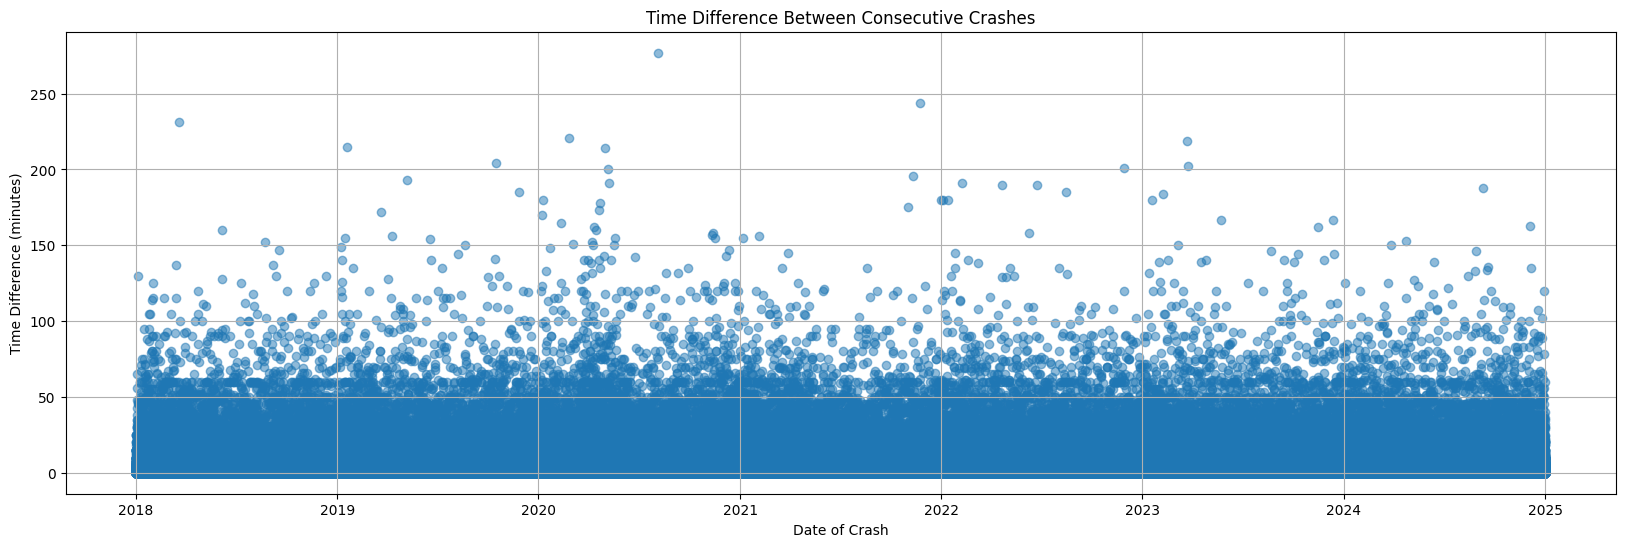

In [13]:
# plot the time differences as a scatter plot
plt.figure(figsize=(20, 6))
plt.scatter(df_time_diff['CRASH_DATETIME'], df_time_diff['Time_Difference'], alpha=0.5)
plt.title('Time Difference Between Consecutive Crashes')
plt.xlabel('Date of Crash')
plt.ylabel('Time Difference (minutes)')
plt.grid()
